# K Means Clustering using scikit-learn in Python - Unsupervised Learning 


practical implementation of K-Means Clustering with Python's machine learning library, scikit-learn.


In this implementation, we will artificially create the clustering data. We will then train and deploy the K Means Clustering algorithm to our dataset. At the end, we will see how elbow method works to estimate the best value for K.

Let's start by importing some important libraries first.

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

## Create Artificial Clusters
Let's create some artificial data here. We can create some clusters using scikit-learn built-in method 
[**`make_blobs`**](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html)<br>
We need to import this first!

In [18]:
from sklearn.datasets import make_blobs

You can check the doc string to or read the documentation of make_blob, at the moment, we want to create 4 clusters with some standard deviation and 2 features. Let's do this!<br>
* `n_samples` : The total number of points equally divided among clusters.
* `n_features` : The number of features for each sample.
* `centers` : The number of centers to generate, or the fixed center locations.
* `cluster_std` : The standard deviation of the clusters.

In [19]:
data = make_blobs(n_samples=1000,
                  n_features=2,centers=4, 
                  cluster_std=3.0,random_state=42)
#Use the same random_state as given if you want the same data

Let's explore the data that we have created, we should know what the data is!

In [20]:
# If we look at the data, it is actually a tuple
data

(array([[ -7.98846414,   6.54680799],
        [ -4.65334108,  -5.98223185],
        [ -5.20464645,  -6.65209342],
        ...,
        [  1.79168217,   9.87031588],
        [ -8.7081638 ,  -7.4410235 ],
        [-10.52483184,   6.69585729]]),
 array([3, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 3, 0, 2, 2, 2, 0, 0, 0, 1, 1, 3,
        3, 3, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 0, 3, 2, 1, 3, 3, 1, 2, 1, 3,
        1, 3, 0, 1, 3, 1, 2, 0, 1, 3, 0, 3, 0, 0, 0, 2, 2, 0, 2, 3, 1, 0,
        2, 2, 1, 0, 3, 0, 1, 2, 1, 3, 1, 0, 1, 0, 2, 0, 0, 0, 1, 3, 2, 2,
        0, 0, 0, 0, 1, 1, 3, 1, 3, 0, 1, 2, 1, 3, 3, 0, 3, 1, 1, 0, 2, 0,
        3, 2, 1, 1, 1, 1, 2, 3, 2, 1, 0, 2, 3, 1, 3, 2, 1, 3, 2, 1, 0, 2,
        1, 3, 1, 3, 0, 2, 1, 1, 0, 0, 3, 3, 3, 1, 1, 0, 0, 0, 0, 3, 2, 2,
        0, 1, 0, 1, 1, 3, 2, 0, 1, 2, 0, 0, 1, 2, 3, 2, 1, 0, 0, 1, 0, 3,
        2, 3, 2, 3, 1, 1, 0, 2, 0, 2, 1, 3, 0, 2, 1, 0, 1, 1, 0, 3, 2, 2,
        2, 3, 0, 2, 1, 0, 1, 1, 2, 0, 1, 2, 2, 3, 2, 2, 1, 0, 2, 0, 3, 1,
        3, 3, 2, 

In [21]:
# lets grab the first element
data[0], len(data[0])

(array([[ -7.98846414,   6.54680799],
        [ -4.65334108,  -5.98223185],
        [ -5.20464645,  -6.65209342],
        ...,
        [  1.79168217,   9.87031588],
        [ -8.7081638 ,  -7.4410235 ],
        [-10.52483184,   6.69585729]]), 1000)

We notice that the first element is a numpy array with number of samples (1000) and two columns of features.  <br>
Let's check the shape of the data!

In [22]:
data[0].shape

(1000, 2)

Is has 1000 sample and 2 features!<br><br>

## Plotting data 
Let's plot the data as a scatter plot, we know we have 4 clusters or blobs in our data[0]

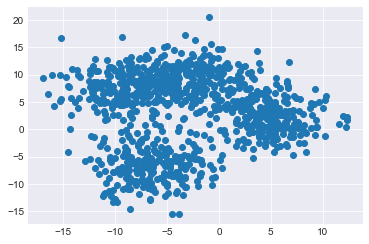

In [23]:
# x = data[0][:,0] - all the rows in the first col of data[0]
# y = data[0][:,1] - all the rows in the second col of data[0]
plt.scatter(data[0][:,0],
            data[0][:,1])

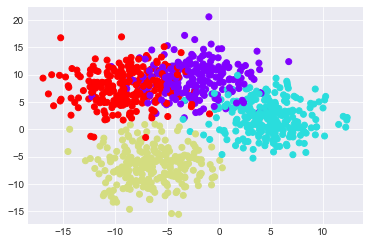

In [24]:
# c = data[1] - is from the centers, it tells which datapoint belong 
# to which blob or cluster, let's replot the data
plt.scatter(data[0][:,0],
            data[0][:,1],
            c=data[1],cmap='rainbow')
#Set1

## KMeans Clustering
Let's import the model and create its instance

In [25]:
from sklearn.cluster import KMeans

Remember, we need to tell the no. of clusters, we already know that have 4 here (we have created data with 4 clusters)! In the real life, we don't know how many clusters we have and which data point belong to which cluster. Here, we are learning and we have created the data with given k and we also know which data point belong to which cluster (which is in `data[1]`).

In [36]:
# Let's create an instance for KMeans
km = KMeans(n_clusters=5)

In [37]:
# Lets fit the model to our features (data[0])
km.fit(data[0])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [38]:
#We can check the cluster centers 
centers = km.cluster_centers_
centers

array([[ 0.73142459,  7.07479306],
       [-6.43505813, -6.75663786],
       [-9.6744134 ,  6.66741907],
       [-4.56149823, 10.42494188],
       [ 5.32039377,  1.21964414]])

The model has created clusters, we can check the label for each data point using `.label_`. 

In [39]:
km.labels_

array([2, 1, 1, 4, 4, 1, 4, 1, 1, 4, 4, 3, 0, 1, 1, 1, 3, 0, 0, 4, 4, 2,
       2, 2, 4, 4, 3, 3, 1, 4, 1, 1, 1, 0, 3, 2, 1, 0, 3, 3, 4, 1, 4, 2,
       4, 0, 3, 4, 2, 4, 1, 0, 4, 2, 0, 2, 3, 0, 3, 1, 1, 3, 1, 2, 4, 0,
       1, 1, 4, 3, 2, 3, 4, 1, 4, 2, 0, 0, 4, 3, 1, 0, 3, 3, 4, 2, 1, 1,
       0, 0, 3, 0, 4, 4, 2, 4, 2, 3, 4, 1, 4, 2, 2, 2, 3, 0, 4, 0, 1, 3,
       3, 1, 0, 4, 4, 4, 1, 2, 1, 4, 0, 1, 2, 4, 2, 1, 0, 2, 1, 0, 3, 1,
       4, 3, 4, 3, 0, 1, 4, 4, 3, 3, 2, 2, 2, 4, 0, 0, 3, 0, 0, 3, 1, 1,
       3, 4, 3, 4, 4, 2, 1, 3, 0, 1, 0, 3, 4, 1, 3, 1, 0, 0, 3, 4, 0, 3,
       1, 2, 1, 2, 0, 4, 3, 1, 3, 1, 4, 2, 3, 1, 4, 0, 0, 0, 3, 3, 1, 1,
       1, 2, 3, 1, 4, 2, 4, 4, 1, 3, 4, 1, 1, 2, 1, 1, 0, 3, 1, 0, 2, 4,
       2, 2, 1, 0, 2, 3, 4, 1, 1, 3, 3, 1, 3, 2, 1, 1, 2, 1, 1, 4, 1, 2,
       1, 4, 2, 0, 0, 3, 4, 4, 0, 4, 2, 4, 4, 1, 3, 1, 1, 4, 4, 0, 2, 4,
       2, 3, 1, 4, 0, 3, 4, 4, 0, 1, 2, 3, 4, 3, 1, 0, 2, 1, 3, 4, 1, 0,
       3, 1, 2, 2, 2, 2, 1, 1, 1, 3, 1, 1, 1, 0, 1,

Once again, I want to mention here that while working with the real life data in unsupervised learning, we don't know the labels. However, we know the labels here, because we have created the data and its labels. Let's plot the original data and the predictions by kmeans side-by-side. 

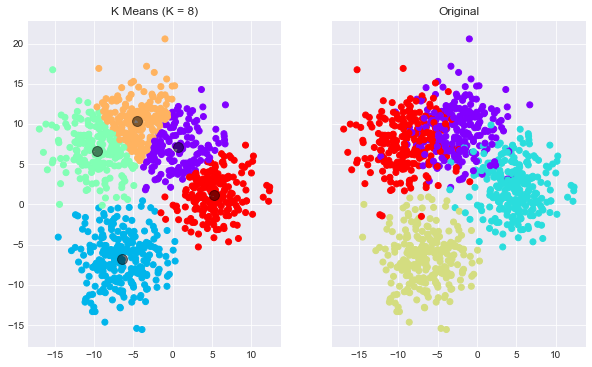

In [40]:
# c = data[1] - is from the centers, it tells which datapoint belong 
# to which blob or cluster, let's replot the data
f, (ax1, ax2) = plt.subplots(nrows=1, 
                             ncols=2, 
                             sharey=True,
                             figsize=(10,6))
# For the fitted one, c = kmeans.labels_  
ax1.set_title('K Means (K = 8)')
# x = data[0][:,0] - all the rows in the first col of data[0]
# y = data[0][:,1] - all the rows in the second col of data[0]
ax1.scatter(data[0][:,0],
            data[0][:,1],
            c=km.labels_,
            cmap='rainbow')

# For the original one, c = data[1] 
ax2.set_title("Original")
ax2.scatter(data[0][:,0],
            data[0][:,1],
            c=data[1],
            cmap='rainbow')
#sns.set_style('darkgrid') for grid purpose

# Let's put the cluster centers on the plot as well 
#centers=kmeans.cluster_centers_
#centers
#FOR CENTROID PLOTTING OR CENTRE VALUES OF THE CLUSTERS
ax1.scatter(x=centers[:, 0], 
            y=centers[:, 1],
            c='black', 
            s=100, 
            alpha=0.5);

## Elbow Method to estimate K value
We already know the K value because we have created the data with 4 clusters!<br>
Let's check the Elbow Method to see what K value this method suggest.<br>
I like to generate a dictionary with `(key,value)` pair as:<br> 
* `K_value: respective_Sum_of_Squared_Distances`

If you want, you can create a list and use `append()` method to get the values!<br>
[`.inertia`](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) attribute gives:  Sum of Squared Distances of samples to their closest cluster center.

In [15]:
# sum_square will be key,value pair for the elbow plot!
sum_square = {}

# Let's test for K from 1 to 10, 
# we can use range() function in the for loop here! 
for k in range(1, 10):
    km = KMeans(n_clusters=k).fit(data[0])
    # .inertia: Computing Sum of Squared Distances 
    # of samples to their closest cluster center.
    sum_square[k] = km.inertia_ 

In [16]:
# Let's have a look on sum_square dic.
sum_square

{1: 82169.487823642587,
 2: 46732.655706169811,
 3: 21233.519961941543,
 4: 15386.308239157897,
 5: 13488.696923011832,
 6: 11818.942398512972,
 7: 10421.446228725144,
 8: 9294.3665205462203,
 9: 8283.1752840653771}

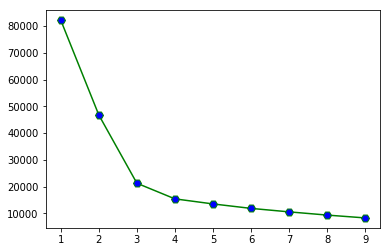

In [16]:
plt.plot(list(sum_square.keys()),
         list(sum_square.values()) ,
         
         # Some figure aesthetics
         linestyle='-',    # '-' for Continuous line 
         marker='H',       # 'H' for Hexagons 
         color='g',        # 'g' for green color
         markersize = 8,   # size of the masker
         markerfacecolor='b')    # 'b' for blue color

So the elbow plot suggest some what 4 as the value of K.